<a href="https://colab.research.google.com/github/a1rishav/plant_image_classifier/blob/master/crop_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan
  - Load and preprocess the data
  - Define model architecture
  - Train the model
  - Make predictions

## Install libraries

In [3]:
! pip install pandas
! pip upgrade tensorflow
! pip install keras-preprocessing

ERROR: unknown command "upgrade"


## Setting up the dataset directory structure to
  - train
    - images from class 1
    - images from class 2 ....
    - images from class n
    
  - test
    - images from class 1
    - images from class 2 ....
    - images from class n
  
  - validate
    - images from class 1
    - images from class 2 ....
    - images from class n
  

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_dir = "'/content/drive/My Drive/ml/plant_detection/dataset'"

In [6]:
ls $dataset_dir/grass | wc -l

2520


In [7]:
ls $dataset_dir/broadleaf | wc -l

191


In [8]:
ls $dataset_dir/soil | wc -l

2137


In [9]:
ls $dataset_dir/soybean | wc -l

6378


In [10]:
ls $dataset_dir/soybean| head -3

1900.tif
1901.tif
1902.tif


In [11]:
mkdir $dataset_dir/validate/soybean

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/validate/soybean’: File exists


In [12]:
mkdir $dataset_dir/validate/soil

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/validate/soil’: File exists


In [13]:
mkdir $dataset_dir/validate/grass

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/validate/grass’: File exists


In [14]:
mkdir $dataset_dir/validate/broadleaf

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/validate/broadleaf’: File exists


In [15]:
mkdir $dataset_dir/test/soybean

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/test/soybean’: File exists


In [16]:
mkdir $dataset_dir/test/soil

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/test/soil’: File exists


In [17]:
mkdir $dataset_dir/test/grass

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/test/grass’: File exists


In [18]:
mkdir $dataset_dir/test/broadleaf

mkdir: cannot create directory ‘/content/drive/My Drive/ml/plant_detection/dataset/test/broadleaf’: File exists


In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/soil/' | head -1000 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/soil/'{} '/content/drive/My Drive/ml/plant_detection/dataset/train/soil/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/soybean/' | head -1000 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/soybean/'{} '/content/drive/My Drive/ml/plant_detection/dataset/train/soybean/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/grass/' | head -1000 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/grass/'{} '/content/drive/My Drive/ml/plant_detection/dataset/train/grass/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/broadleaf/' | head -1000 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/broadleaf/'{} '/content/drive/My Drive/ml/plant_detection/dataset/train/broadleaf/'

In [24]:
ls $dataset_dir/train/soil | wc -l

800


In [25]:
ls $dataset_dir/train/soybean | wc -l

800


In [26]:
ls $dataset_dir/train/grass | wc -l

800


In [27]:
ls $dataset_dir/train/broadleaf | wc -l

800


In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/soil/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/soil/'{} '/content/drive/My Drive/ml/plant_detection/dataset/validate/soil/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/grass/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/grass/'{} '/content/drive/My Drive/ml/plant_detection/dataset/validate/grass/'


In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/soybean/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/soybean/'{} '/content/drive/My Drive/ml/plant_detection/dataset/validate/soybean/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/broadleaf/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/broadleaf/'{} '/content/drive/My Drive/ml/plant_detection/dataset/validate/broadleaf/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/soil/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/soil/'{} '/content/drive/My Drive/ml/plant_detection/dataset/test/soil/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/soybean/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/soybean/'{} '/content/drive/My Drive/ml/plant_detection/dataset/test/soybean/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/broadleaf/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/broadleaf/'{} '/content/drive/My Drive/ml/plant_detection/dataset/test/broadleaf/'

In [0]:
# ls -Q '/content/drive/My Drive/ml/plant_detection/dataset/train/grass/' | head -100 | xargs -i mv '/content/drive/My Drive/ml/plant_detection/dataset/train/grass/'{} '/content/drive/My Drive/ml/plant_detection/dataset/test/grass/'

In [35]:
ls $dataset_dir/validate/soil | wc -l


100


In [36]:
ls $dataset_dir/validate/soybean | wc -l


100


In [37]:
ls $dataset_dir/validate/broadleaf | wc -l


100


In [38]:
ls $dataset_dir/validate/grass | wc -l


100


In [39]:
ls $dataset_dir/test/soil | wc -l


100


In [40]:
ls $dataset_dir/test/soybean | wc -l


100


In [41]:
ls $dataset_dir/test/grass | wc -l


100


In [42]:
ls $dataset_dir/test/broadleaf | wc -l


100


# Import libraries

In [0]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### We will be using ImageDataGenerator which easies the flow of reading images from the directory and preprocessing.

In [44]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_directory(
directory="/content/drive/My Drive/ml/plant_detection/dataset/train",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

valid_generator=test_datagen.flow_from_directory(
directory="/content/drive/My Drive/ml/plant_detection/dataset/validate",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

test_generator=test_datagen.flow_from_directory(
directory="/content/drive/My Drive/ml/plant_detection/dataset/test",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))

Found 3200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.



## Model Architecture

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

## Start training

In [49]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
100/100 [==============================] - 1471s 15s/step - loss: 0.9316 - accuracy: 0.5575 - val_loss: 0.7676 - val_accuracy: 0.7448
Epoch 2/10
100/100 [==============================] - 190s 2s/step - loss: 0.6509 - accuracy: 0.6991 - val_loss: 0.5842 - val_accuracy: 0.7663
Epoch 3/10
100/100 [==============================] - 192s 2s/step - loss: 0.5854 - accuracy: 0.7362 - val_loss: 0.6611 - val_accuracy: 0.7989
Epoch 4/10
100/100 [==============================] - 193s 2s/step - loss: 0.5217 - accuracy: 0.7675 - val_loss: 0.4955 - val_accuracy: 0.8125
Epoch 5/10
100/100 [==============================] - 193s 2s/step - loss: 0.4671 - accuracy: 0.8044 - val_loss: 0.5082 - val_accuracy: 0.7962
Epoch 6/10
100/100 [==============================] - 191s 2s/step - loss: 0.4323 - accuracy: 0.8200 - val_loss: 0.3956 - val_accuracy: 0.8043
Epoch 7/10
100/100 [==============================] - 192s 2s/step - loss: 0.3929 - accuracy: 0.8359 - val_loss: 0.3948 - val_accuracy: 0.83


## Predict Classes
  - `The output here is the probability of the image belonging to 4 classes`


In [50]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

400/400 [==============================] - 188s 471ms/step


In [51]:
pred

array([[7.7783167e-01, 1.5808393e-01, 1.1240958e-03, 6.2960342e-02],
       [8.6780918e-01, 1.1389135e-01, 1.4996678e-03, 1.6799765e-02],
       [5.7578015e-01, 1.2358100e-01, 6.1504461e-04, 3.0002382e-01],
       ...,
       [6.6676978e-03, 7.0736744e-03, 2.1974452e-05, 9.8623657e-01],
       [3.0862594e-02, 4.3022018e-02, 4.7214530e-04, 9.2564327e-01],
       [2.2227041e-02, 1.1320987e-02, 3.5893830e-04, 9.6609300e-01]],
      dtype=float32)

In [52]:
pred.shape

(400, 4)

In [130]:
! ls $dataset_dir/test/broadleaf| shuf -n 2

1039.tif
1013.tif


#### We will pick 2 images of each class and predict their class

In [0]:
broad_leaf_images =! ls $dataset_dir/test/broadleaf| shuf -n 2
broad_leaf_image_dir = "/content/drive/My Drive/ml/plant_detection/dataset/test/broadleaf/"
broad_leaf_images = [broad_leaf_image_dir + s for s in broad_leaf_images]

In [0]:
grass_images =! ls $dataset_dir/test/grass| shuf -n 2
grass_image_dir = "/content/drive/My Drive/ml/plant_detection/dataset/test/grass/"
grass_images = [grass_image_dir + s for s in grass_images]

In [0]:
soil_images =! ls $dataset_dir/test/soil| shuf -n 2
soil_image_dir = "/content/drive/My Drive/ml/plant_detection/dataset/test/soil/"
soil_images = [soil_image_dir + s for s in soil_images]

In [0]:
soybean_images =! ls $dataset_dir/test/soybean| shuf -n 2
soybean_image_dir = "/content/drive/My Drive/ml/plant_detection/dataset/test/soybean/"
soybean_images = [soybean_image_dir + s for s in soybean_images]

In [189]:
class_mapping = {v: k for k, v in train_generator.class_indices.items()}
class_mapping

{0: 'broadleaf', 1: 'grass', 2: 'soil', 3: 'soybean'}

In [0]:
import cv2
from keras.preprocessing import image

def predict_image(image_class, image_paths):
  print ("Original class : " + image_class)
  for image_path in image_paths:
    read_image = image.load_img(path= image_path,target_size=(100,100,3))
    imgplot = plt.imshow(read_image)
    read_image = np.expand_dims(read_image, axis=0)
    print ('shape : ', read_image.shape)
    print("Predicted class : " + class_mapping[model.predict_classes(read_image)[0]])
    plt.show()

Original class : soil
shape :  (1, 100, 100, 3)
Predicted class : soil


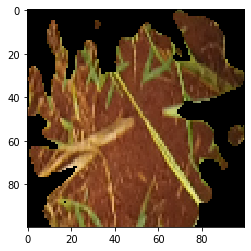

shape :  (1, 100, 100, 3)
Predicted class : soil


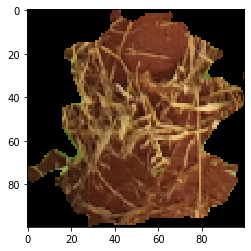

In [208]:
predict_image('soil', soil_images)

Original class : grass
shape :  (1, 100, 100, 3)
Predicted class : grass


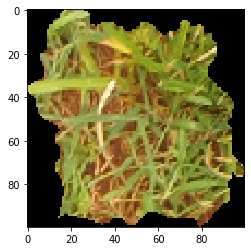

shape :  (1, 100, 100, 3)
Predicted class : grass


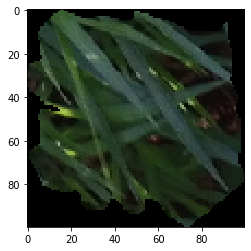

In [209]:
predict_image('grass', grass_images)

Original class : soybean
shape :  (1, 100, 100, 3)
Predicted class : soybean


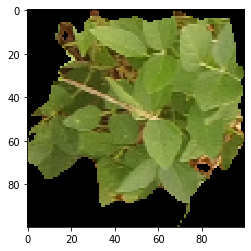

shape :  (1, 100, 100, 3)
Predicted class : soybean


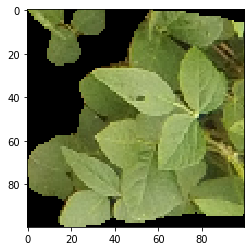

In [213]:
predict_image('soybean', soybean_images)

Original class : broad_leaf
shape :  (1, 100, 100, 3)
Predicted class : broadleaf


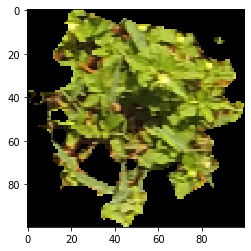

shape :  (1, 100, 100, 3)
Predicted class : broadleaf


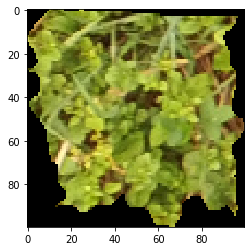

In [216]:
predict_image('broad_leaf', broad_leaf_images)

## Saving the model

In [0]:
model.save('/content/drive/My Drive/ml/plant_detection/model.h5')